In [1]:
#libraries for data analysis
import pandas as pd
import numpy as np
#libraries for normality tests
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

In [2]:
#import the User Datasets
xls1 = pd.ExcelFile('Page_views_2018.xlsx')
xls2 = pd.ExcelFile('Page_views_2019.xlsx')
Page_views_2018 = pd.read_excel(xls1, 'Dataset1')
Page_views_2019 = pd.read_excel(xls2, 'Dataset1')

In [3]:
#Remove the dates for ease
Page_views_2018=Page_views_2018['Page Views']
Page_views_2019=Page_views_2019['Page Views']

In [4]:
#convert datasets into arrays
Page_views_2018=Page_views_2018.values
Page_views_2019=Page_views_2019.values

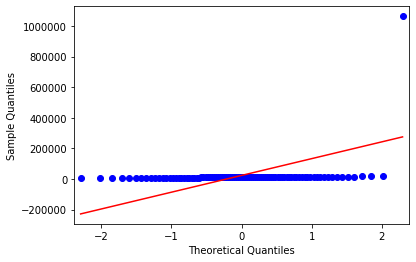

In [5]:
#plot both datasets using qqplot to check for normality
qqplot(Page_views_2018, line='s')
pyplot.show()

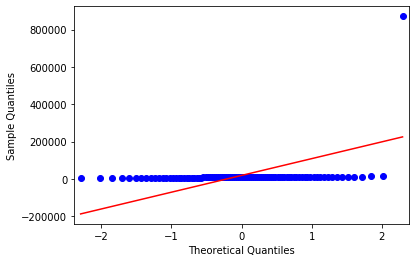

In [6]:
qqplot(Page_views_2019, line='s')
pyplot.show()

### Both datasets look not normal since they fall off the qq plot

In [7]:
# normality test with Shapiro
stat, p = shapiro(Page_views_2018)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.094, p=0.000
Sample does not look Gaussian (reject H0)


In [8]:
stat, p = shapiro(Page_views_2019)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.093, p=0.000
Sample does not look Gaussian (reject H0)


### Since both datasets are not normaly distributed non-parametric tests should be used.

In [9]:
#import ranksums (Wilcoxon-Mann-Whitney (WMW) rank sum test) to test wether the difference between the two datasets is significant
from scipy.stats import ranksums

In [10]:
stat, p =  ranksums(Page_views_2018,Page_views_2019)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('The difference between the two datasets is not significant (fail to reject H0)')
else:
	print('The difference between the two datasets is significant (reject H0)')

Statistics=5.625, p=0.000
The difference between the two datasets is significant (reject H0)


## We conclude that there is significant difference between the two datasets